This file is intended to help me tweak the parameters in the synthetic generator to get more diversity in predicted class

In [29]:
# Core libraries
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy for softmax
from scipy.special import softmax

# Configure visual style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 4)

In [30]:
def load_data(path='../output/emotion_data.csv'):
    return pd.read_csv(path)

df = load_data()
df.head()

,sleep_hours,steps,alcohol,social_mins,work_stress,nutrition_score,happy_score,energetic_score,engaged_score,happy_prob,energetic_prob,engaged_prob,predicted_emotion
0,7.496714,5185.806323,0,86.945957,5.658010,2.665496,9.078847,8.522244,9.039961,0.394475,0.226095,0.379430,Happy
1,6.361736,5633.400644,5,67.591159,5.474946,2.905202,6.939714,5.436472,5.876820,0.637811,0.141854,0.220335,Happy
2,7.447689,5283.142727,2,83.495221,5.546654,6.971935,11.760860,9.175342,8.713926,0.890582,0.067112,0.042307,Happy
3,7.923030,6132.501656,6,83.850644,3.962311,8.933629,10.890981,9.016391,11.577612,0.318428,0.048853,0.632719,Engaged
4,6.565847,7436.614238,2,141.873360,4.686060,8.871161,12.969266,12.571020,13.743604,0.260372,0.174839,0.564788,Engaged


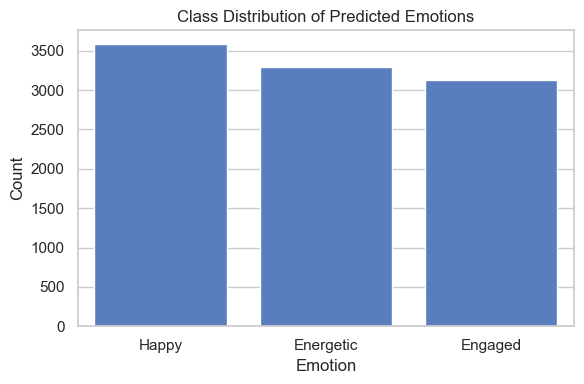

In [34]:
# Class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='predicted_emotion', order=df['predicted_emotion'].value_counts().index)
plt.title("Class Distribution of Predicted Emotions")
plt.ylabel("Count")
plt.xlabel("Emotion")
plt.tight_layout()
plt.show()

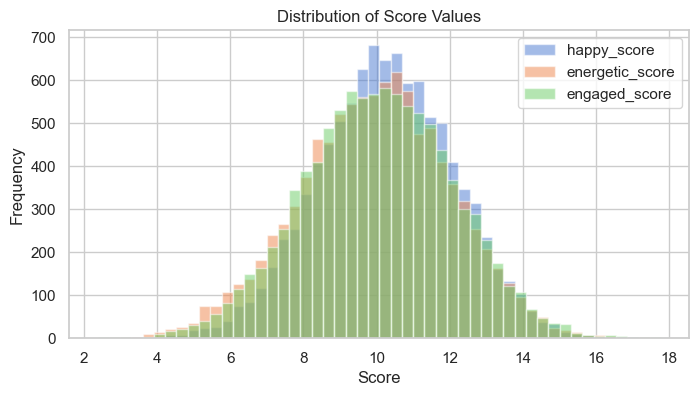

In [35]:
# Distribution of scores
score_cols = ['happy_score', 'energetic_score', 'engaged_score']
df[score_cols].plot(kind='hist', bins=50, alpha=0.5, figsize=(8, 4), sharex=True)
plt.title("Distribution of Score Values")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

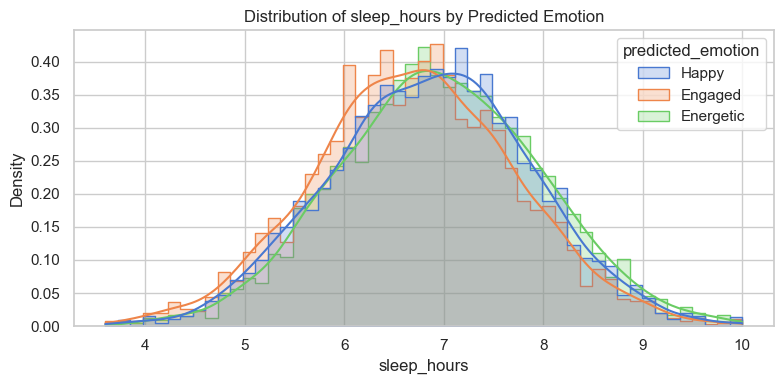

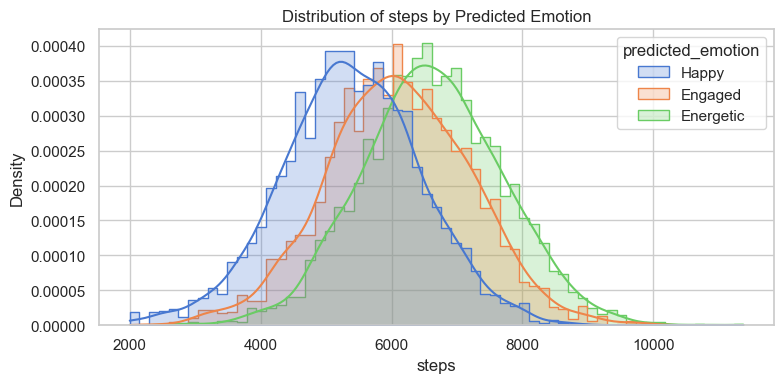

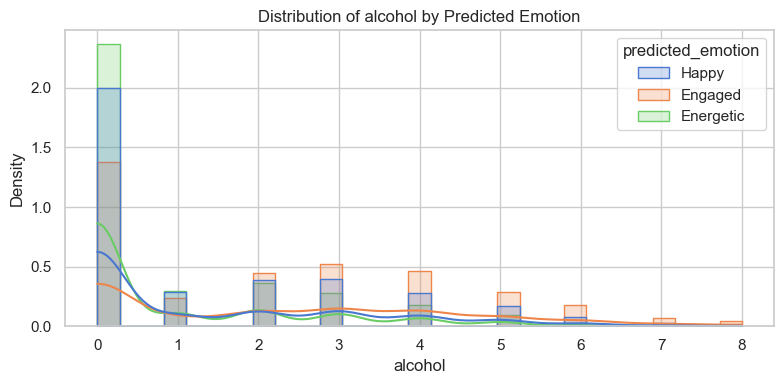

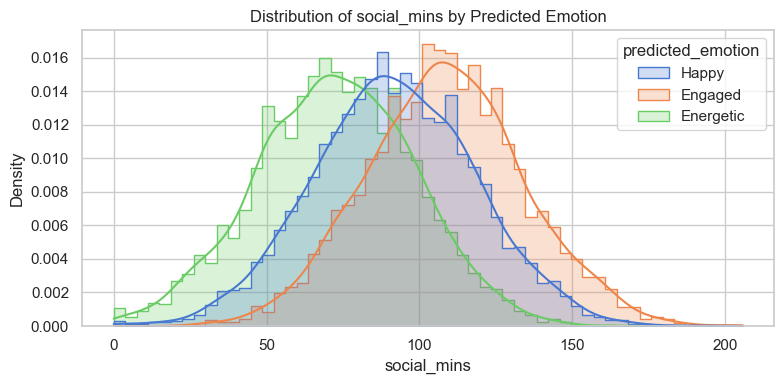

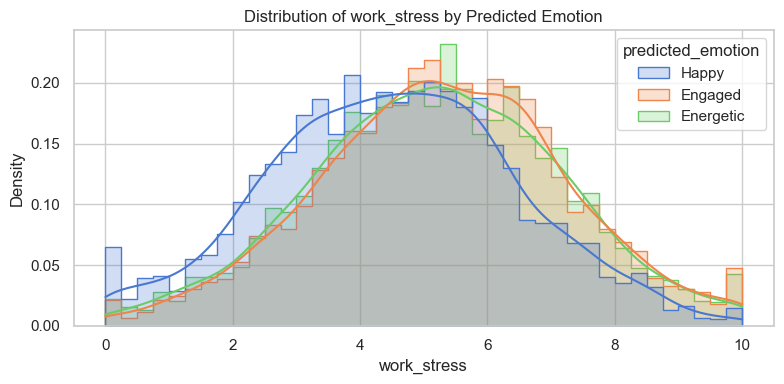

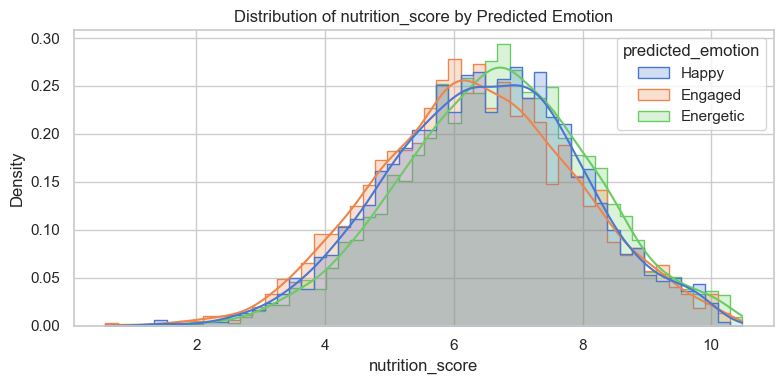

In [33]:
# Histograms of input features by predicted emotion
features = ['sleep_hours', 'steps', 'alcohol', 'social_mins', 'work_stress', 'nutrition_score']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='predicted_emotion', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by Predicted Emotion')
    plt.tight_layout()
    plt.show()


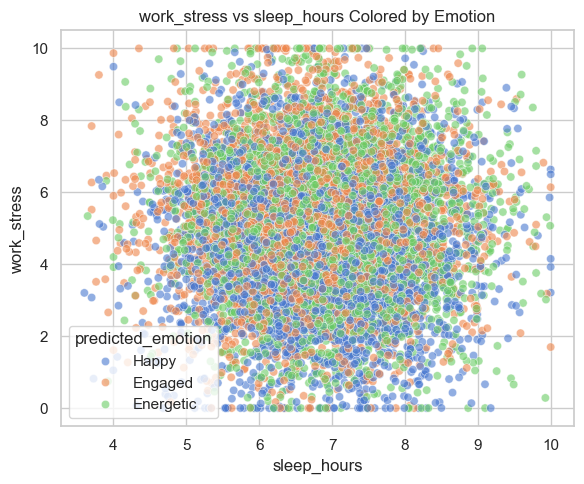

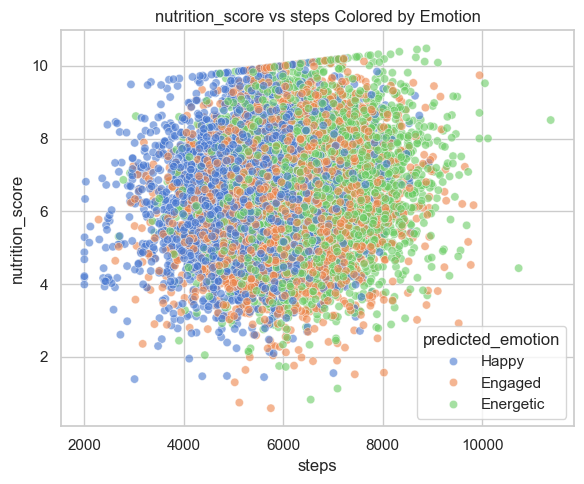

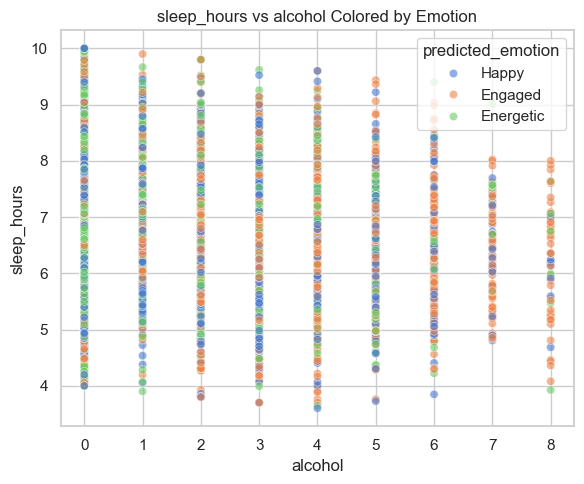

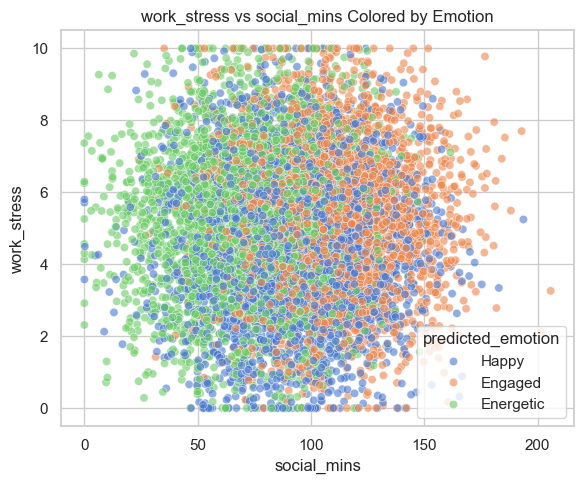

In [28]:
# Scatter plots

scatter_pairs = [
    ('sleep_hours', 'work_stress'),
    ('steps', 'nutrition_score'),
    ('alcohol', 'sleep_hours'),
    ('social_mins', 'work_stress')
]

for x, y in scatter_pairs:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x=x, y=y, hue='predicted_emotion', alpha=0.6)
    plt.title(f'{y} vs {x} Colored by Emotion')
    plt.tight_layout()
    plt.show()

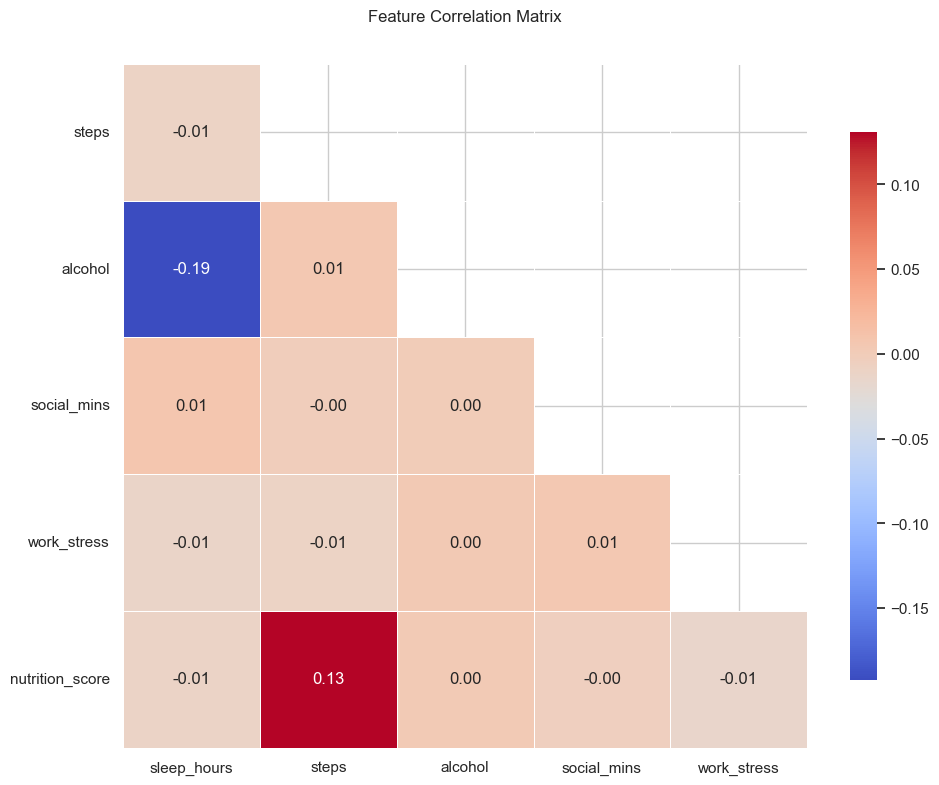

In [52]:
# Compute correlation matrix
corr = df[features].corr()

# Drop first row and last column
corr_reduced = corr.drop(index=corr.index[0], columns=corr.columns[-1])

# Create a mask to hide the triangle
mask = np.triu(np.ones_like(corr_reduced, dtype=bool), k=1)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_reduced,
    mask=mask,                  # Hide upper triangle
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True
)

# Optionally put x-axis at the top
#plt.xticks(rotation=45, ha="left")
plt.yticks(rotation=0)
#plt.gca().xaxis.set_ticks_position('top')
#plt.gca().xaxis.set_label_position('top')

plt.title("Feature Correlation Matrix", y=1.05)
plt.tight_layout()
plt.show()